## Wind Power Generation Forecasting

### Week 2
### Importing The Required Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#### Loading the Dataset

In [37]:
file_path = 'wind_power.csv'
data = pd.read_csv(file_path)

### Feature Engineering

In [38]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%d %m %Y %H:%M')
data['hour'] = data['Date/Time'].dt.hour
data['day'] = data['Date/Time'].dt.day
data['month'] = data['Date/Time'].dt.month

### Define Features and Target

In [39]:
X = data[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)',
          'Wind Direction (°)', 'hour', 'day', 'month']]
y = data['LV ActivePower (kW)']

#### Split Dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [41]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [42]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [43]:
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R2 Score: {r2_lr:.4f}")

Linear Regression Performance:
MAE: 196.68
RMSE: 407.66
R2 Score: 0.9026


### Plot Linear Regression

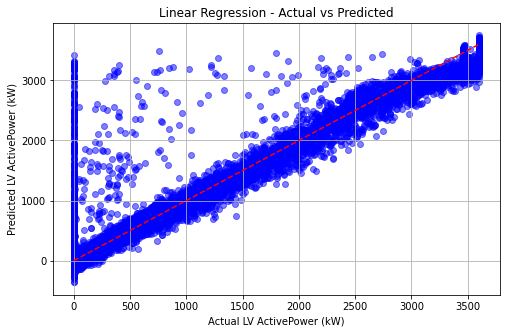

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual LV ActivePower (kW)')
plt.ylabel('Predicted LV ActivePower (kW)')
plt.title('Linear Regression - Actual vs Predicted')
plt.grid(True)
plt.show()

## XGBoost Model

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [47]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

In [48]:
print("\nXGBoost Performance:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R2 Score: {r2_xgb:.4f}")


XGBoost Performance:
MAE: 84.12
RMSE: 200.74
R2 Score: 0.9764


### Plot XGBoost

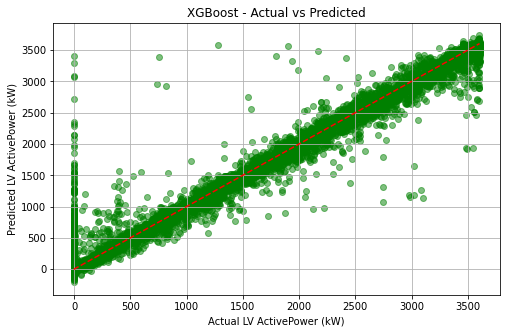

In [49]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual LV ActivePower (kW)')
plt.ylabel('Predicted LV ActivePower (kW)')
plt.title('XGBoost - Actual vs Predicted')
plt.grid(True)
plt.show()